# Plotting rocketsled time benchmark data

In [1]:
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
# plt.style.use('seaborn')
# plt.style.use('classic')

import seaborn
seaborn.set_color_codes()
seaborn.set_palette('colorblind')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [11]:
# Load Gaussian Proccess timing runs
gp1 = np.loadtxt('time_gp_1.txt')
gp2 = np.loadtxt('time_gp_2.txt')

# t2 = np.zeros(t1.shape)
# N = 900
# t2[0:N] = np.loadtxt('time_rf_temp.txt')[0:N]

# Load Random Forest timing runs
rf1 = np.loadtxt('time_rf_1.txt')
rf2 = np.loadtxt('time_rf_2.txt')

# Load random "dummy" timing run
dm1 = np.loadtxt('time_dummy.txt')

In [12]:
# Fit a regression model up to 5000 iters (set param)
PRED = 5000

In [5]:
rf_model = LinearRegression(fit_intercept=True)

rf_model.fit(np.arange(rf1[1500:].size).reshape(-1,1)+1500, rf1[1500:])
rf_xfit = np.linspace(0, PRED, PRED)
rf_yfit = rf_model.predict(rf_xfit[:, np.newaxis])

In [6]:
gp_model = make_pipeline(PolynomialFeatures(degree=3),
                         LinearRegression())

gp_model.fit(np.arange(gp1.size).reshape(-1,1), gp1)
gp_xfit = np.linspace(0, PRED, PRED)
gp_yfit = gp_model.predict(gp_xfit[:, np.newaxis])

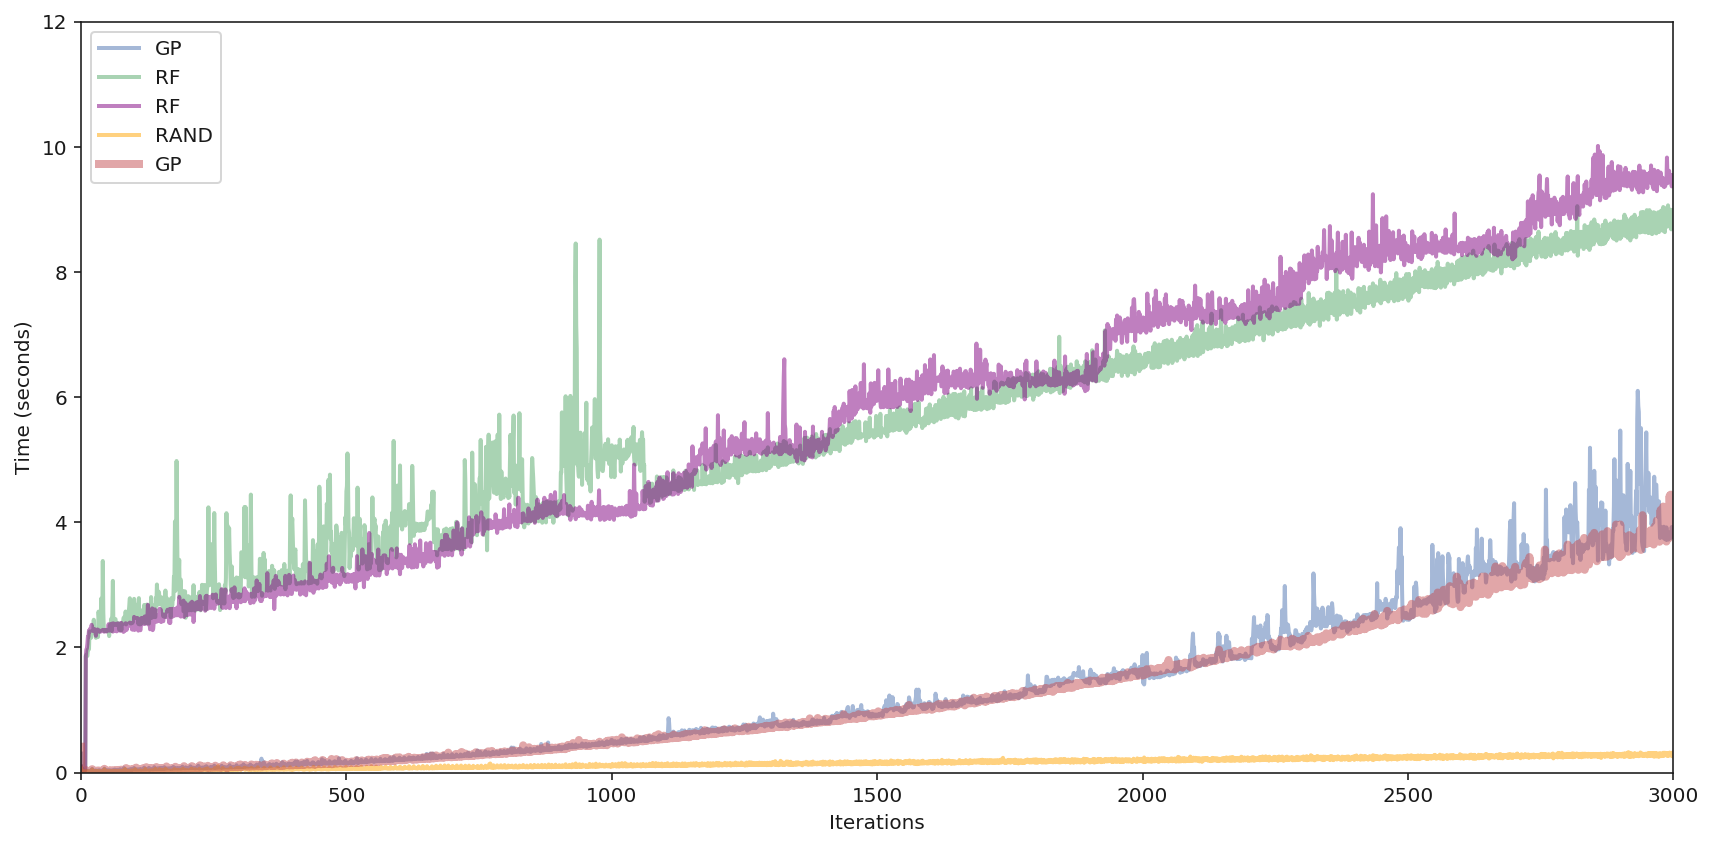

In [7]:
plt.figure(figsize=(12,6))
plt.xlim(0,3000)
plt.ylim(0,12)
plt.plot(gp1, label='GP', lw=2, alpha=0.5, c='b')
plt.plot(rf1, label='RF', lw=2, alpha=0.5, c='g')
plt.plot(rf2, label='RF', lw=2, alpha=0.5, c='purple')
plt.plot(dm1, label='RAND', lw=2, alpha=0.5, c='orange')
# plt.plot(rf_xfit, rf_yfit, '--g')
# plt.plot(gp_xfit, gp_yfit, '--b')
plt.plot(gp2, lw=4, c='r', alpha=0.5, label='GP')
plt.ylabel("Time (seconds)")
plt.xlabel("Iterations")
# plt.loglog()
# plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()

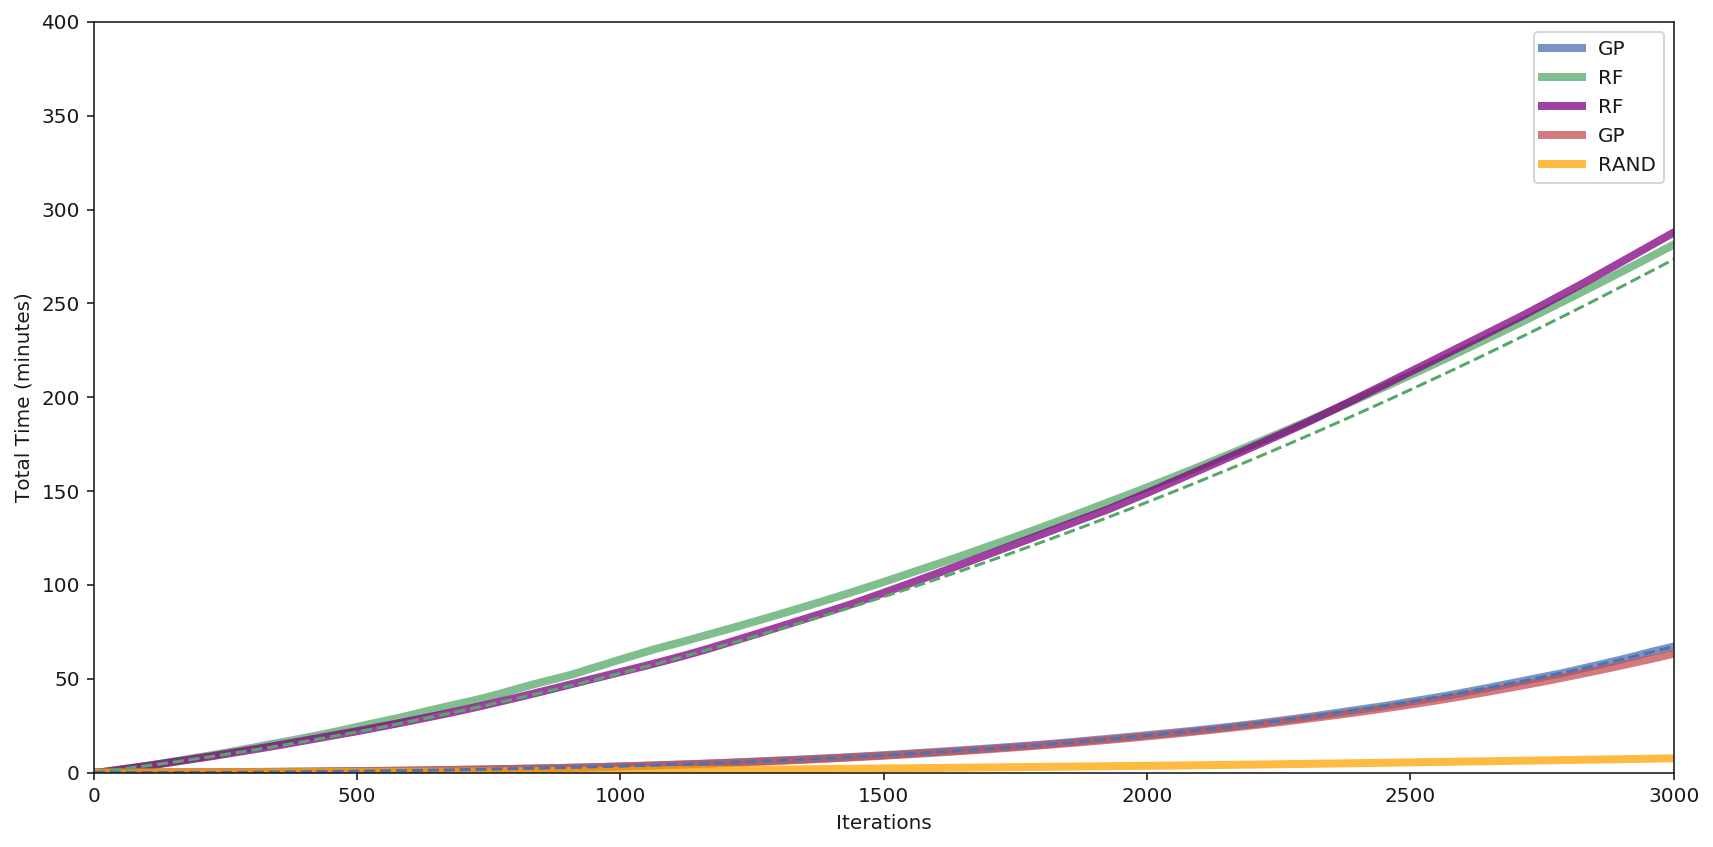

In [8]:
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(gp1)/60, label='GP', lw=4, alpha=0.75, c='b')
plt.plot(np.cumsum(rf1)/60, label='RF', lw=4, alpha=0.75, c='g')
plt.plot(np.cumsum(rf2)/60, label='RF', lw=4, alpha=0.75, c='purple')
plt.plot(np.cumsum(gp2)/60, label='GP', lw=4, alpha=0.75, c='r')
plt.plot(np.cumsum(dm1)/60, label='RAND', lw=4, alpha=0.75, c='orange')
plt.plot(np.cumsum(rf_yfit)/60, '--g')
plt.plot(np.cumsum(gp_yfit)/60, '--b')

plt.xlim(0,3000)
plt.ylim(0,400)
plt.ylabel("Total Time (minutes)")
plt.xlabel("Iterations")
# plt.xscale('log')
# plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()

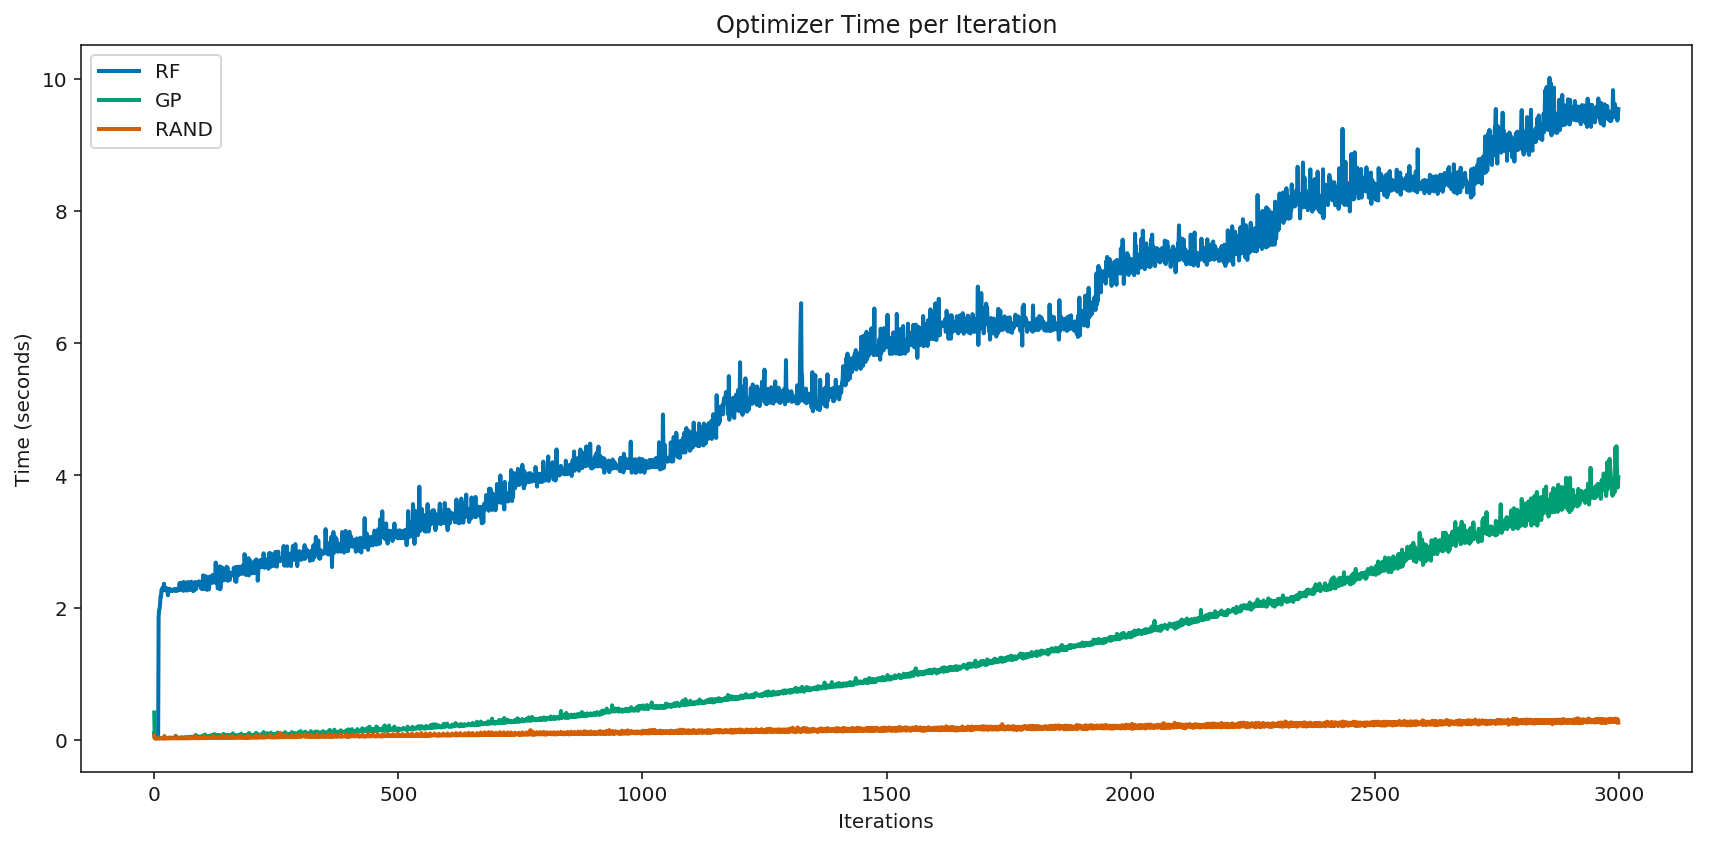

In [9]:
plt.figure(figsize=(12,6))
plt.title("Optimizer Time per Iteration")
plt.plot(rf2[:3000], label='RF',   lw=2)
plt.plot(gp2[:3000], label='GP',   lw=2)
plt.plot(dm1[:3000], label='RAND', lw=2)
plt.ylabel("Time (seconds)")
plt.xlabel("Iterations")
# plt.loglog()
# plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()

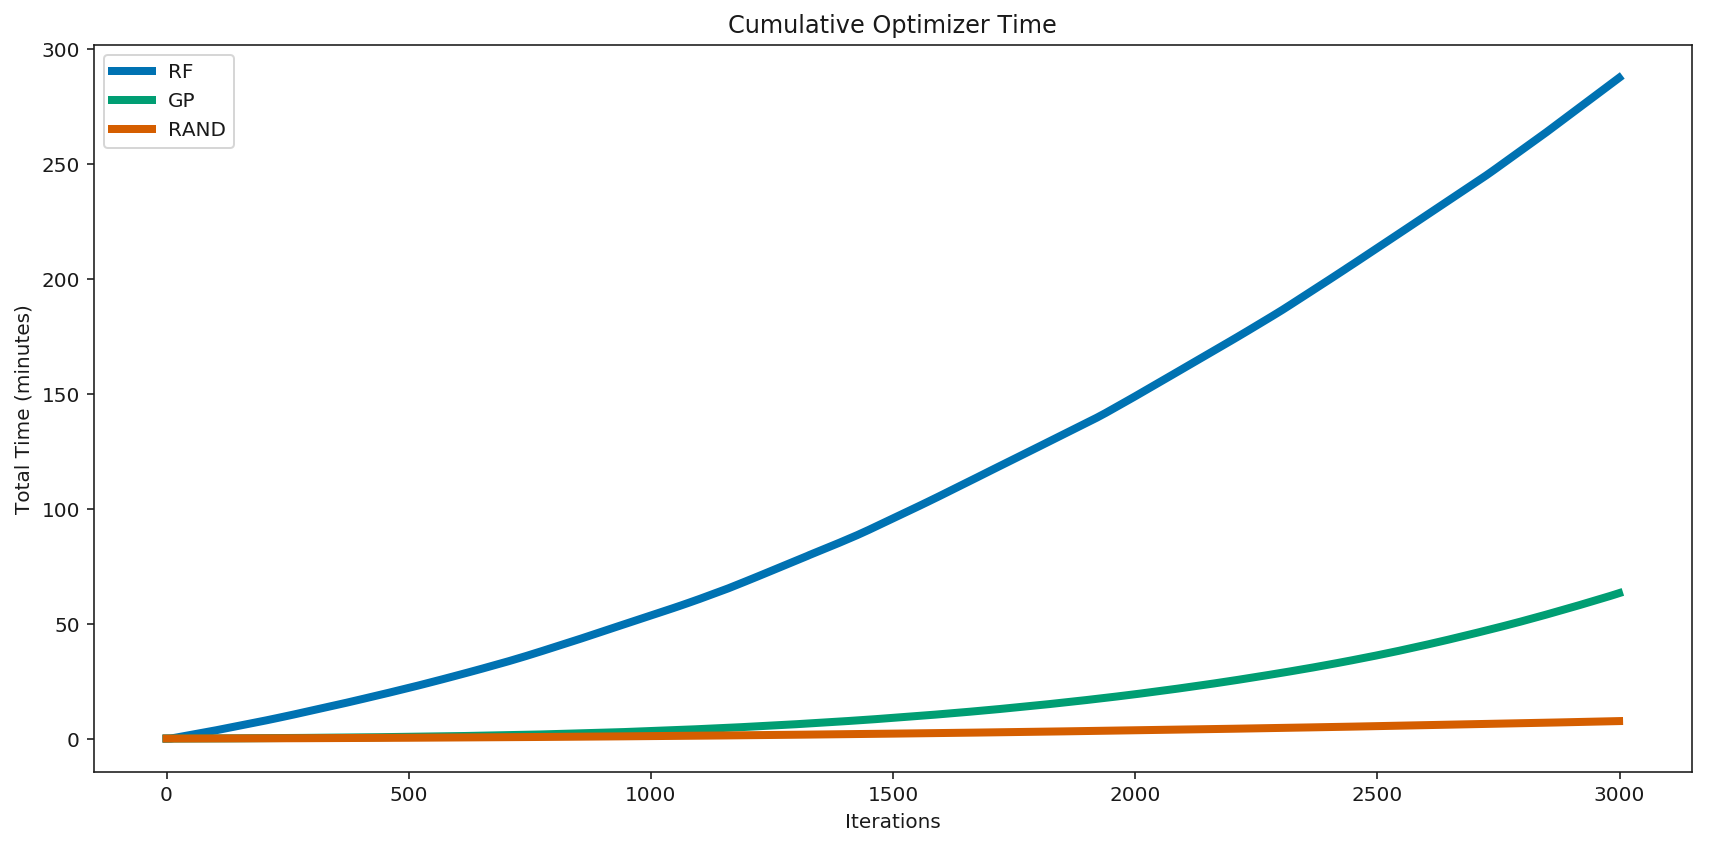

In [10]:
plt.figure(figsize=(12,6))
plt.title("Cumulative Optimizer Time")
plt.plot(np.cumsum(rf2[:3000])/60, label='RF',   lw=4)
plt.plot(np.cumsum(gp2[:3000])/60, label='GP',   lw=4)
plt.plot(np.cumsum(dm1[:3000])/60, label='RAND', lw=4)
plt.ylabel("Total Time (minutes)")
plt.xlabel("Iterations")
# plt.xscale('log')
# plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.show()